# import the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

google_df = pd.read_csv("googleplaystore.csv")
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [2]:
google_df = google_df.drop_duplicates(keep='first')
print('google_df.shape:', google_df.shape)

google_df.shape: (10358, 13)


Let's have a look at the rows of the column Type having NULL values


In [3]:
google_df[google_df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [4]:
google_df['Type'].fillna("Free", inplace = True)
google_df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

lets take a look on all the category

In [5]:
category = google_df.Category.unique()
category

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [6]:
#display first row 
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
#display last row
google_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
#ten randoms rows of data
google_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2014,YouTube Kids,FAMILY,4.5,470694,Varies with device,"50,000,000+",Free,0,Everyone,Entertainment;Music & Video,"August 3, 2018",3.43.3,4.1 and up
5496,Undead Assault,GAME,4.3,4704,37M,"100,000+",Free,0,Everyone 10+,Arcade,"November 4, 2015",1.4.6,2.3 and up
8078,FlexRelease CX,BUSINESS,NaN,4,2.0M,"1,000+",Free,0,Everyone,Business,"July 25, 2016",1.5.0,2.3.3 and up
10512,Funny Jokes,FAMILY,3.9,2505,2.9M,"100,000+",Free,0,Mature 17+,Entertainment,"June 18, 2018",1.2,4.1 and up
8279,Driver Permit Test Prep DC DMV Driver's Licens...,FAMILY,4.7,78,11M,"5,000+",Free,0,Everyone,Education,"October 12, 2017",2.9.0,4.1 and up
1906,Talking Tom Gold Run,GAME,4.6,2698882,78M,"100,000,000+",Free,0,Everyone,Action,"July 31, 2018",2.8.2.59,4.1 and up
8155,SMS Sender - sluzba.cz,COMMUNICATION,NaN,12,72k,"1,000+",Free,0,Everyone,Communication,"June 1, 2012",2.00.00,2.0 and up
506,Howlr,DATING,3.9,105,27M,"5,000+",Free,0,Mature 17+,Dating,"June 19, 2018",1.0.4,4.4 and up
7487,CONTRACT KILLER: ZOMBIES,GAME,4.4,144545,13M,"5,000,000+",Free,0,Teen,Action,"December 1, 2011",1.1.0,2.1 and up
2762,Tophatter - 90 Second Auctions,SHOPPING,4.3,105773,Varies with device,"10,000,000+",Free,0,Everyone,Shopping,"August 5, 2018",Varies with device,4.4 and up


In [9]:
#summary for numeric columns
google_df.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
#summary for categorical colums  
google_df.describe(include="object")

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10358,10358,10358,10358,10358,10358,10358,10357,10358,10358,10350,10355
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1943,593,1526,1488,9592,9592,8382,842,298,1302,2379


check for missing values


In [11]:
google_df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

we can see that the dataset contains null or missing values . The column Rating,type,content rating ,current ver and Android ver contains 1474,1,1,8,3 missing values


#Let's treat the missing values

In [12]:
google_df[google_df.Rating.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Since there is only one value missing in the Type column
So, Lets fill the missing value, After cross-checking in the playstore the missing value is found to be Free, So Now we can fill the missing value with Free

In [13]:
google_df['Type'].fillna("Free", inplace = True)
google_df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [14]:
google_df.dropna(subset = ['Content Rating'], inplace=True)
google_df.dropna(subset = ['Category'], inplace=True)


Let us replace the missing values of the Rating Column with the Mode value of that entire column.

In [15]:
modeValueRating = google_df['Rating'].mode()
modeValueRating[0]

4.4

In [16]:
google_df['Rating'].fillna(value=modeValueRating[0], inplace = True)
google_df.isnull().sum()



App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [17]:
#drop na or size,minimum installs,appname and installs
#google_df.dropna(subset=["Size","App","Installs"],inplace=True)
#google_df.isnull().sum()

In [18]:
#google_df.dropna(axis=1,inplace=True)
#google_df.isnull().sum()

In [19]:
#tmp_cast = pd.to_datetime(google_df['Last Updated']
                         # , errors='coerce')
#google_df[tmp_cast.isna()]

2. What category has the most app ?


In [20]:
most_app = google_df["Category"].value_counts()
most_app

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

3. What are the number of apps with a 4+ star rating


In [21]:
#first 
apps_rating = google_df["Rating"].value_counts()
apps_rating
 


4.4    2497
4.3    1016
4.5     977
4.2     888
4.6     768
4.1     657
4.0     539
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      64
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
1.9      12
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

Got a TypeError > not supported between instances of float and str so i converted the string to a float 

In [22]:
google_df.Rating = google_df.Rating.astype(float)

In [23]:
#now lets get the number of apps with 4 star rating 
apps_rating = google_df[google_df.Rating>4.0]
apps_rating

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


4. what are the top 4 choice apps for teenagers? Display the ratings of the apps with the appropriate chart

In [24]:
#firstly lets get the top 4 choice apps for teenagers

top_four_app = google_df[google_df["Content Rating"] == "Teen"].sort_values(by= "App",ascending= False).head()
top_four_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5698,日本AV历史,BOOKS_AND_REFERENCE,4.1,215,30M,"10,000+",Free,0,Teen,Books & Reference,"March 6, 2018",1.2,4.0 and up
5569,【Miku AR Camera】Mikuture,FAMILY,4.4,36268,41M,"1,000,000+",Free,0,Teen,Entertainment,"April 25, 2017",3.0.15,4.2 and up
7751,الفاتحون Conquerors,FAMILY,4.5,108130,40M,"5,000,000+",Free,0,Teen,Strategy,"August 3, 2018",1.8.0,4.0 and up
8644,wikiHow: how to do anything,BOOKS_AND_REFERENCE,4.4,43088,3.0M,"1,000,000+",Free,0,Teen,Books & Reference,"April 19, 2017",2.7.3,4.0 and up
2640,uCiC- Videos and Photos on demand,SOCIAL,4.0,2052,7.0M,"100,000+",Free,0,Teen,Social,"September 27, 2017",2.16,4.4 and up


C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 21382 (\N{CJK UNIFIED IDEOGRAPH-5386}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 21490 (\N{CJK UNIFIED IDEOGRAPH-53F2}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 12304 (\N{LEFT BLACK LENTICULAR BRACKET}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\lib\s

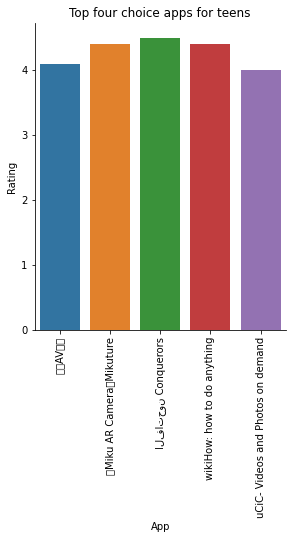

In [53]:
#display the ratings of the app on a chart
import matplotlib.pyplot as plt
sns.catplot(x = "App",
            y = "Rating",
            kind = "bar",
            data = top_four_app,
           )
plt.title("Top four choice apps for teens")
plt.xticks(rotation =90)
plt.show()

5 . What are the top5 apps prefered by teenagers in the Family category ?

In [34]:
print("These are the top apps preferred by teens in Adventure category")
top_apps = google_df.loc[(google_df.Category == "FAMILY") & (google_df["Content Rating"] == "Teen")]
top_apps.sort_values(by= "Installs",ascending=False).head(5)


These are the top apps preferred by teens in Adventure category


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10018,Food Network,FAMILY,4.1,7823,Varies with device,"500,000+",Free,0,Teen,Entertainment,"July 27, 2018",Varies with device,Varies with device
4765,The X-Files: Deep State - Hidden Object Adventure,FAMILY,4.5,22018,53M,"500,000+",Free,0,Teen,Casual,"July 18, 2018",2.6.1,5.0 and up
9027,Across Age DX,FAMILY,3.8,5964,48M,"500,000+",Free,0,Teen,Role Playing,"January 9, 2015",1.1.0,2.2 and up
10391,Police VAZ LADA Simulator,FAMILY,3.6,3502,61M,"500,000+",Free,0,Teen,Simulation,"September 11, 2016",1.3,2.3 and up
4704,V for Vampire - Free,FAMILY,4.3,2772,35M,"500,000+",Free,0,Teen,Puzzle,"September 20, 2014",1.0.1,2.1 and up


6 . What is the most expensive app in the playstore

In [61]:
print("This is the most expensive app in the playstore")
most_expensive = google_df[google_df["Type"] == "Paid"][google_df["Price"]== google_df["Price"].max()]
most_expensive
#most_expensive.groupby("Price").max()

This is the most expensive app in the playstore


C:\Users\HP\AppData\Local\Temp\ipykernel_21680\3755532437.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  most_expensive = google_df[google_df["Type"] == "Paid"][google_df["Price"]== google_df["Price"].max()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


7 . What is the average rating per category ? Display the top 10 apps with respect to their average ratings

In [36]:
average_rating = google_df.groupby("Category").mean()
TopTen_average = average_rating.sort_values(by="Rating", ascending=False).head(10)
TopTen_average

,Rating
Category,
EVENTS,4.425000
EDUCATION,4.376154
ART_AND_DESIGN,4.360000
BOOKS_AND_REFERENCE,4.359565
PERSONALIZATION,4.347165
PARENTING,4.316667
BEAUTY,4.303774
GAME,4.286262
HEALTH_AND_FITNESS,4.281373


In [30]:
#Display the top 10 apps with respect to their average rating

8 . Using pivot table , find the average rating and highest price per category.

In [37]:
price_rating_pivot = google_df.pivot_table(index = "Category", aggfunc = {"Rating":np.mean, "Price":np.max})
price_rating_pivot

,Price,Rating
Category,,
ART_AND_DESIGN,0,4.360000
AUTO_AND_VEHICLES,0,4.220000
BEAUTY,0,4.303774
BOOKS_AND_REFERENCE,0,4.359565
BUSINESS,0,4.211944
COMICS,0,4.163333
COMMUNICATION,0,4.191530
DATING,0,4.052551
EDUCATION,0,4.376154


9  . What is the percentage market share of each app by category? Visualize the output using the appropriate chart

In [51]:
def market_share_pct(df):
    
    #first group by category and take the sum of installs
    mkt_share = df.groupby("Category").agg("sum")["Rating"]
    #take the percentage of every row using transform
    mkt_share_pct = mkt_share.transform(lambda x:x/x.sum())*100
    #transform to frame and sort using install
    mkt_share_pct_sorted = mkt_share_pct_sorted = mkt_share_pct.to_frame().sort_values(by="Rating", ascending=False)
    return mkt_share_pct_sorted
#call the function
market_share_pct(google_df)

,Rating
Category,
FAMILY,18.748941
GAME,10.999071
TOOLS,7.898436
BUSINESS,4.117011
MEDICAL,3.959061
PRODUCTIVITY,3.947844
PERSONALIZATION,3.861086
LIFESTYLE,3.544727
COMMUNICATION,3.511764


In [73]:
import matplotlib as plt
sns.relplot(x = "Category",
            y = "Rating",
            data = market_share_pct,
            kind = "line")
plt.show()
        

ValueError: Could not interpret value `Category` for parameter `x`

10  . How is the installation distributed?

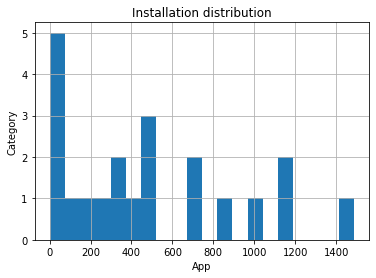

In [50]:
import matplotlib.pyplot as plt

google_df["Installs"].value_counts().hist(bins = 20)
plt.title("Installation distribution")
plt.xlabel("App")
plt.ylabel("Category")
plt.show()
